# Downloading species data using NBN API

In [1]:
import requests
import io
import zipfile
import contextily as ctx
import geopandas as gpd
import pandas as pd

base api url - see https://api.nbnatlas.org/#ws2 for more info and the full range of APIs available to access NBN data.

In [3]:
url = 'https://records-ws.nbnatlas.org/occurrences/index/download'

Next populate the parameters field, here are some example parameters to add

In [4]:
parameters = {
    'q': 'genus:Myotis',
    'reasonTypeId': 10,
    'lat': 51.459770 ,
    'lon': -2.59,
    'radius':5.0
}

Use `requests.get` to combine above into single GET url

In [5]:
r = requests.get(url, params=parameters)

We can see what the url actually looks like when the parameters are added in by using the `request.url` method. You can see how the parameters are added into the url

In [6]:
print(r.url)

https://records-ws.nbnatlas.org/occurrences/index/download?q=genus%3AMyotis&reasonTypeId=10&lat=51.45977&lon=-2.59&radius=5.0


Now let's test the status code of the request using `request.status_code`. For a list of status codes and what they mean check [this link out](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status). Ours returns 200 - which means it's successful.

In [7]:
print(r.status_code)

200


So as we have a valid requests url, we can now get the data. To do this we could just download the zip file to store locally if you want to keep a copy local, but a slightly tidier way to do it involves writing to memory using the `io` library. To access data from a `request` item you use `request.content`. I know in this instance that the file I'm interested in is contained within the zipfile named `data.csv`, so we can read it in as a dataframe using pandas `read_csv` function.

In [8]:
file = zipfile.ZipFile(io.BytesIO(r.content))

df = pd.read_csv(file.open('data.csv'))

In [9]:
df.head()

,NBN Atlas record ID,Occurrence ID,Licence,Rightsholder,Scientific name,Taxon author,Name qualifier,Common name,Species ID (TVK),Taxon Rank,...,OSGR 1km,Country,State/Province,Vitality,Occurrence status assumed to be present,Country inferred from coordinates,Latitude Longitude calculated from grid reference,First of the month,Geodetic datum assumed WGS84,Coordinate precision and uncertainty transposed
0,e4d5b781-e505-4caf-9668-ba1c82b1e549,1290781,CC-BY-NC,BRERC,Myotis,"Kaup, 1829",NaN,Myotis Bat species,NBNSYS0000040730,genus,...,ST6170,United Kingdom,England,alive,False,True,True,False,False,False
1,afb98f16-83b3-4679-8472-eaac2355efb5,147995939,OGL,NaN,Myotis bechsteinii,"(Kuhl, 1817)",NaN,Bechstein's Bat,NHMSYS0000528024,species,...,ST6071,United Kingdom,England,NaN,True,True,False,True,True,True
2,f3e7cb87-c55a-4718-b247-00a47335747e,1921691,CC-BY-NC,BRERC,Myotis daubentonii,"(Kuhl, 1817)",NaN,Daubenton's Bat,NHMSYS0000528028,species,...,ST5877,United Kingdom,England,alive,False,True,True,False,False,False
3,ef46936a-8d2b-4249-9dec-b310db268e7b,1290786,CC-BY-NC,BRERC,Myotis,"Kaup, 1829",NaN,Myotis Bat species,NBNSYS0000040730,genus,...,ST6170,United Kingdom,England,alive,False,True,True,False,False,False
4,eb53e70e-a491-4f53-8648-99ddd611df2d,1325967,CC-BY-NC,BRERC,Myotis daubentonii,"(Kuhl, 1817)",NaN,Daubenton's Bat,NHMSYS0000528028,species,...,ST6276,United Kingdom,England,alive,False,True,True,False,False,False


Now we have the data in a standard pandas dataframe, let's change it into a `GeoDataFrame` using geopandas.

In [10]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude (WGS84)'], df['Latitude (WGS84)']), crs=4326)

We can also convert the data in EPSG:3857 to work with web tiles.

In [11]:
gdf = gdf.to_crs(3857)

Now we have our data as a geodataframe with crs set to EPSG:3857, so let's plot it with a contaxtily base map.

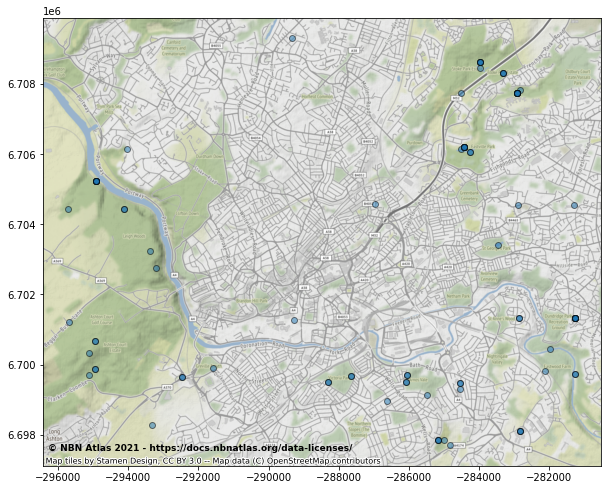

In [44]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ax.text(0.01, 0.05, '© NBN Atlas 2021 - https://docs.nbnatlas.org/data-licenses/', transform=ax.transAxes, fontsize=9,
        verticalalignment='top', fontweight='semibold')
ctx.add_basemap(ax)

In [ ]:
fontsize